In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

sns.set_theme(style="whitegrid")

# Load Data

In [3]:
X_train = pd.read_csv("../../data/preprocessed/X_train.csv", index_col=None)
X_test = pd.read_csv("../../data/preprocessed/X_test.csv", index_col=None)
y_train = pd.read_csv("../../data/preprocessed/y_train.csv", index_col=None)

X_train = X_train.drop(columns=["dataset"], axis=1)
X_test = X_test.drop(columns=["dataset"], axis=1)

X_train.head(5)

,model_DTC,model_KNC,model_LGBMC,model_LR,model_SVC,tuning_full,tuning_model,tuning_no,scoring_ACC,scoring_AUC,...,enc_dim_40,enc_dim_41,enc_dim_42,enc_dim_43,enc_dim_44,enc_dim_45,enc_dim_46,enc_dim_47,enc_dim_48,enc_dim_49
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.018899,-0.075766,-0.04139,-0.067163,0.152373,0.054675,-0.035989,-0.195375,-0.048616,0.10147
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.018899,-0.075766,-0.04139,-0.067163,0.152373,0.054675,-0.035989,-0.195375,-0.048616,0.10147
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,-0.018899,-0.075766,-0.04139,-0.067163,0.152373,0.054675,-0.035989,-0.195375,-0.048616,0.10147
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.018899,-0.075766,-0.04139,-0.067163,0.152373,0.054675,-0.035989,-0.195375,-0.048616,0.10147
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.018899,-0.075766,-0.04139,-0.067163,0.152373,0.054675,-0.035989,-0.195375,-0.048616,0.10147


In [4]:
N_COMPONENTS = 10

pca = PCA(n_components=N_COMPONENTS)
X_train_transformed = pca.fit_transform(X_train)
X_train_transformed = pd.DataFrame(X_train_transformed, columns=[f"PC{i}" for i in range(N_COMPONENTS)])
X_train_transformed.head(5)

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.660958,0.062017,0.857148,-0.632519,-0.082097,0.787906,-0.109192,0.608917,0.129893,-0.365456
1,-0.660958,0.062017,0.857148,-0.632519,-0.082097,0.787906,-0.109192,0.608917,0.129893,-0.365456
2,0.827546,0.605395,-0.459351,0.205773,-0.055909,0.047972,-0.141090,0.611817,0.783985,-0.365824
3,-0.363508,-0.094748,0.787897,0.610621,-0.263677,0.998098,-0.129556,0.597092,-0.378961,-0.357401
4,-0.727162,0.863604,-0.310482,-0.266567,0.786406,-0.261113,-0.124620,0.615040,0.154631,-0.361583


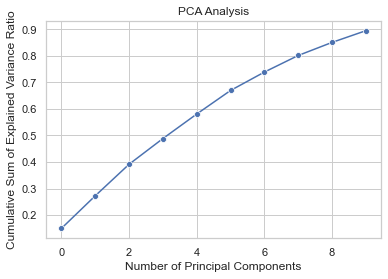

In [5]:
sns.lineplot(x=np.arange(0, N_COMPONENTS), y=pca.explained_variance_ratio_.cumsum(), marker="o")
plt.title("PCA Analysis")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Sum of Explained Variance Ratio")
plt.show()

In [6]:
N_CLUSTERS = 6

# Cluster PCA results
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
kmeans.fit_transform(X_train_transformed)
X_train_transformed["cluster"] = kmeans.labels_
X_train_transformed.head(5)

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,cluster
0,-0.660958,0.062017,0.857148,-0.632519,-0.082097,0.787906,-0.109192,0.608917,0.129893,-0.365456,5
1,-0.660958,0.062017,0.857148,-0.632519,-0.082097,0.787906,-0.109192,0.608917,0.129893,-0.365456,5
2,0.827546,0.605395,-0.459351,0.205773,-0.055909,0.047972,-0.141090,0.611817,0.783985,-0.365824,1
3,-0.363508,-0.094748,0.787897,0.610621,-0.263677,0.998098,-0.129556,0.597092,-0.378961,-0.357401,3
4,-0.727162,0.863604,-0.310482,-0.266567,0.786406,-0.261113,-0.124620,0.615040,0.154631,-0.361583,0


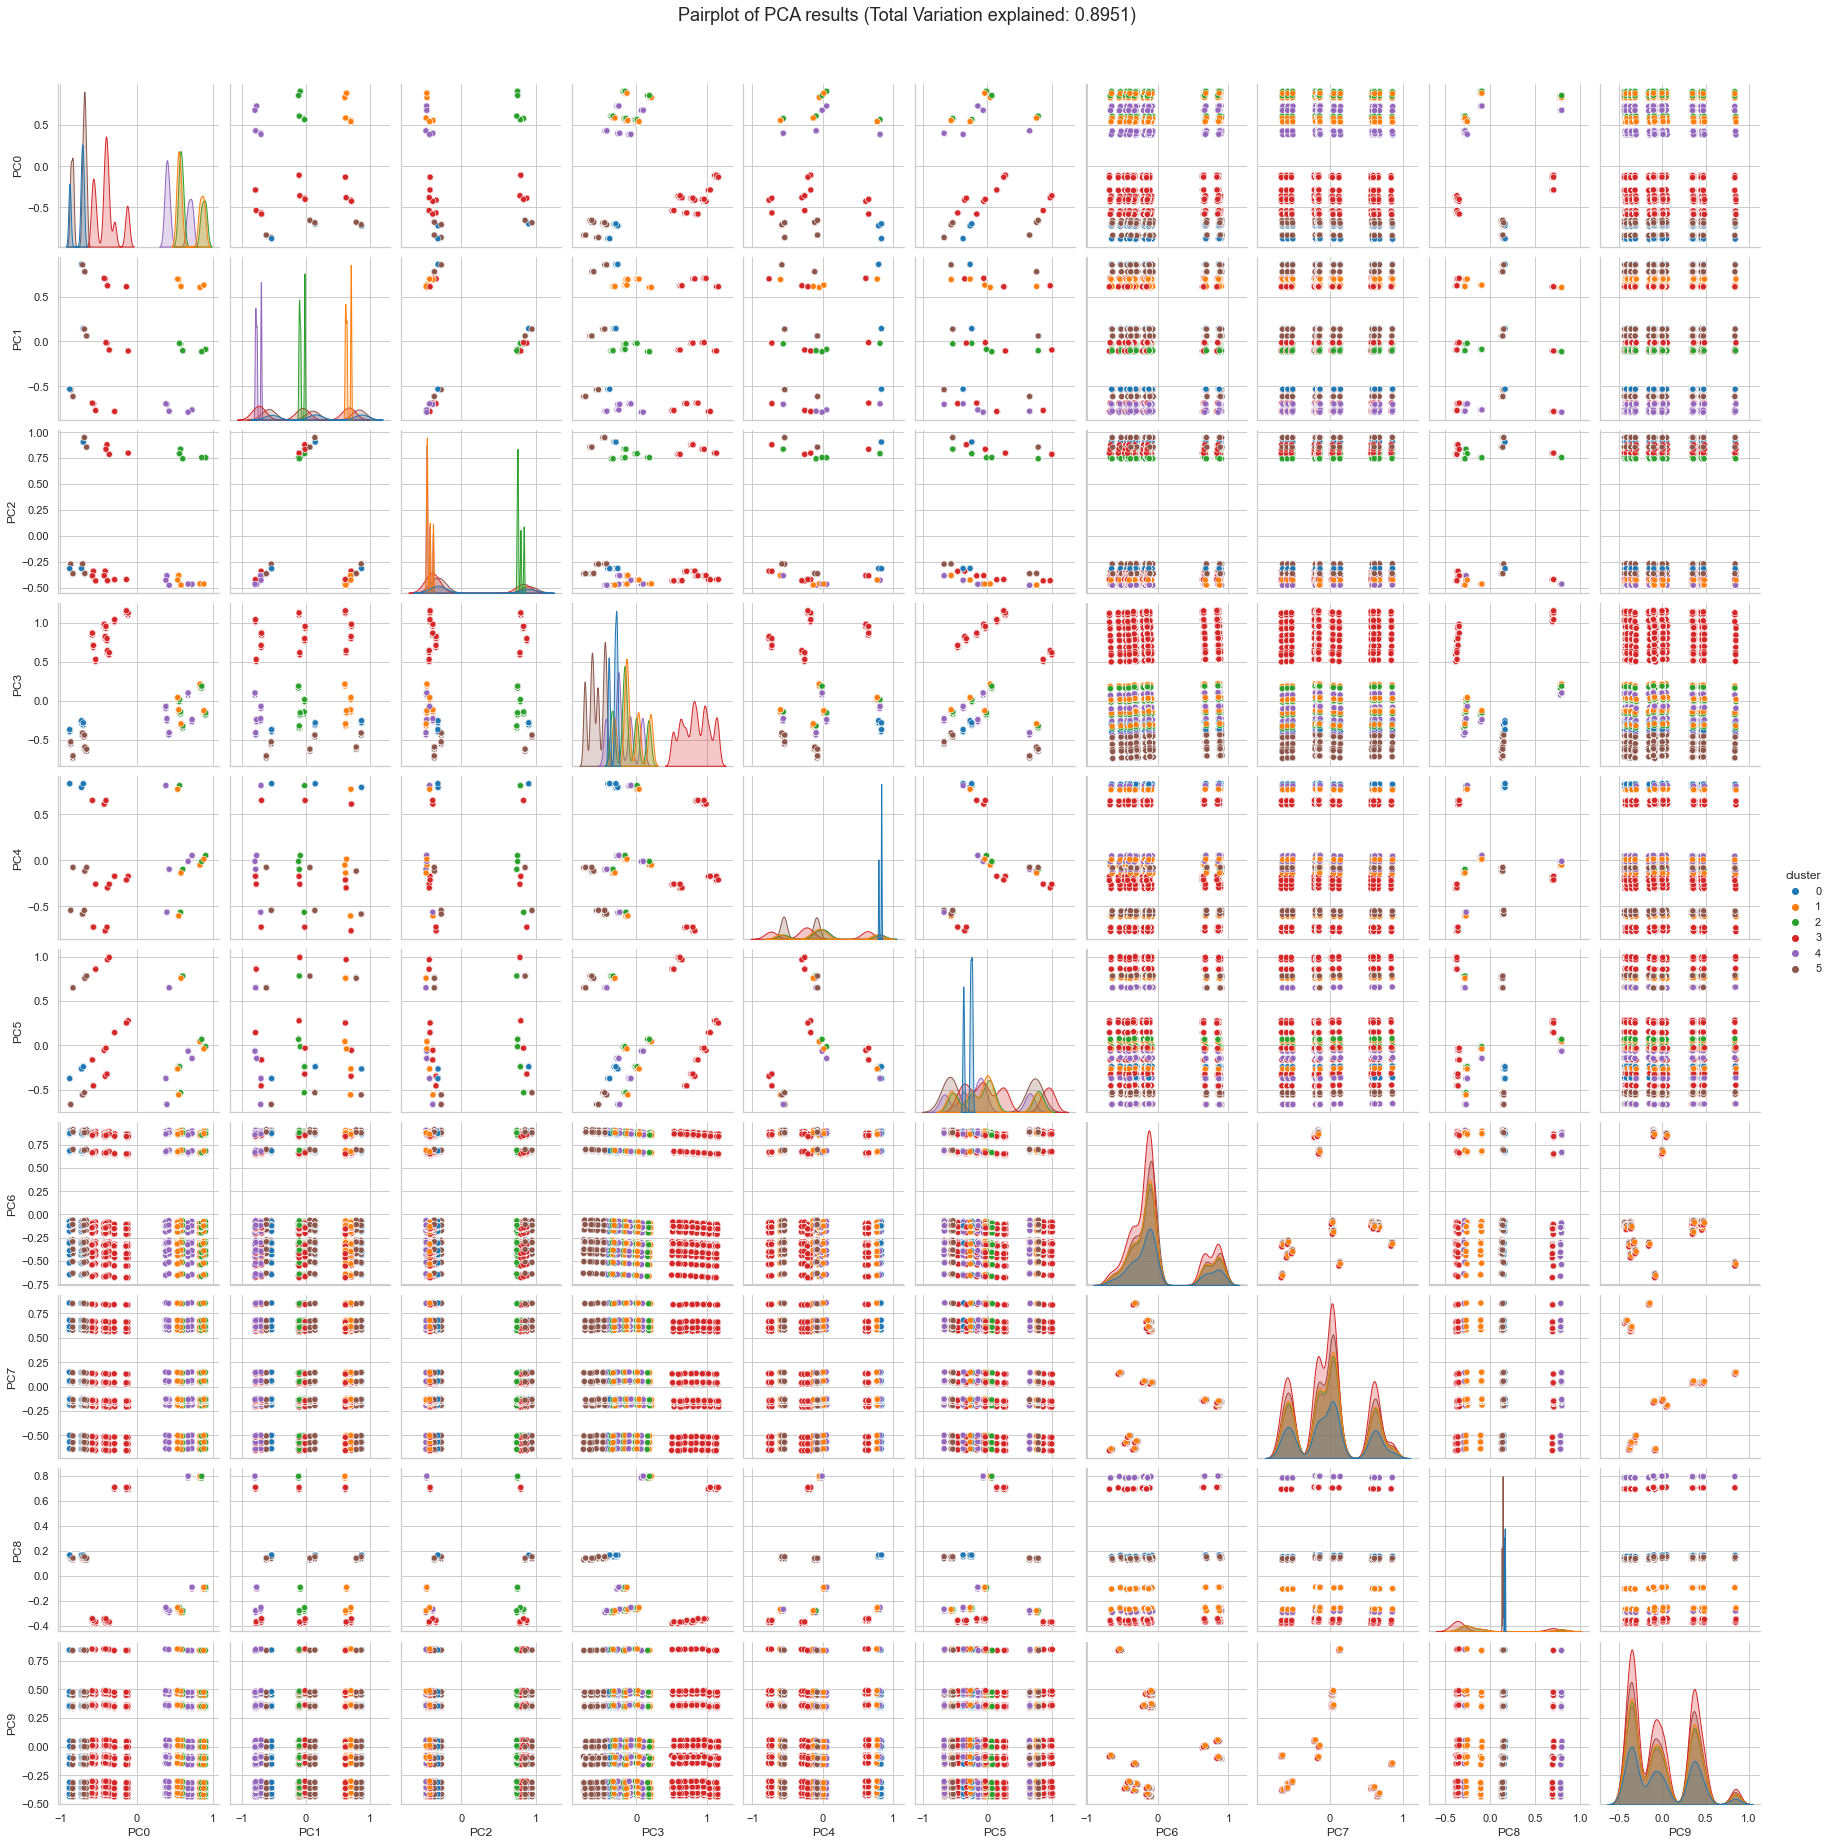

In [7]:
#plt.figure(figsize=(12, 12), dpi=128)
g = sns.pairplot(X_train_transformed, hue="cluster", palette="tab10")
g.fig.suptitle(f"Pairplot of PCA results (Total Variation explained: {sum(pca.explained_variance_ratio_):.4})", y=1.03, fontsize=18)
plt.show()

In [8]:
X_train["cluster"] = kmeans.labels_
X_train["cv_score"] = y_train["cv_score"]
X_train.head(5)

,model_DTC,model_KNC,model_LGBMC,model_LR,model_SVC,tuning_full,tuning_model,tuning_no,scoring_ACC,scoring_AUC,...,enc_dim_42,enc_dim_43,enc_dim_44,enc_dim_45,enc_dim_46,enc_dim_47,enc_dim_48,enc_dim_49,cluster,cv_score
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.04139,-0.067163,0.152373,0.054675,-0.035989,-0.195375,-0.048616,0.10147,5,0.650562
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.04139,-0.067163,0.152373,0.054675,-0.035989,-0.195375,-0.048616,0.10147,5,0.650712
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,-0.04139,-0.067163,0.152373,0.054675,-0.035989,-0.195375,-0.048616,0.10147,1,0.626492
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.04139,-0.067163,0.152373,0.054675,-0.035989,-0.195375,-0.048616,0.10147,3,0.625839
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.04139,-0.067163,0.152373,0.054675,-0.035989,-0.195375,-0.048616,0.10147,0,0.652093


In [9]:
X_train[["cluster", "cv_score"]].groupby(["cluster"]).describe()

cv_score                                                            
           count      mean       std  min       25%       50%       75%  max
cluster                                                                     
0         3511.0  0.733369  0.234805  0.0  0.597110  0.802805  0.911105  1.0
1         6009.0  0.731830  0.234876  0.0  0.588889  0.804981  0.908237  1.0
2         5809.0  0.727817  0.234214  0.0  0.581878  0.796582  0.900291  1.0
3         8350.0  0.734117  0.230882  0.0  0.589501  0.802183  0.908341  1.0
4         5601.0  0.731158  0.233383  0.0  0.588346  0.799162  0.907110  1.0
5         6774.0  0.737411  0.229353  0.0  0.596758  0.804620  0.910565  1.0